In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd/gdrive/MyDrive/cricket_legends/

/gdrive/MyDrive/cricket_legends


In [5]:
ls

adam_gilchrist/  dale_steyn/       james_anderson/      rahul_dravid/
alastair_cook/   don_bradman/      jaques_kallis/       ricky_ponting/
allan_donald/    garfield_sobers/  kapil_dev/           sachin_tendulkar/
brian_lara/      glenn_mcgrath/    kumar_sangakkara/
chris_gayle/     ian_botham/       mahela_jayawardene/
curtly_ambrose/  imran_khan/       ms_dhoni/


In [6]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [7]:
import os
import PIL
import pathlib
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [25]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=10
CHANNELS=3

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/gdrive/MyDrive/cricket_legends",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 4871 files belonging to 21 classes.


In [10]:
class_names = dataset.class_names
class_names

['adam_gilchrist',
 'alastair_cook',
 'allan_donald',
 'brian_lara',
 'chris_gayle',
 'curtly_ambrose',
 'dale_steyn',
 'don_bradman',
 'garfield_sobers',
 'glenn_mcgrath',
 'ian_botham',
 'imran_khan',
 'james_anderson',
 'jaques_kallis',
 'kapil_dev',
 'kumar_sangakkara',
 'mahela_jayawardene',
 'ms_dhoni',
 'rahul_dravid',
 'ricky_ponting',
 'sachin_tendulkar']

In [11]:
len(dataset)

79

In [12]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(62, 256, 256, 3)
tf.Tensor(
[[[15.        8.       16.      ]
  [15.        8.       16.      ]
  [17.25      7.125    15.125   ]
  ...
  [13.       11.       14.      ]
  [13.       11.       14.      ]
  [13.       11.       14.      ]]

 [[15.        8.       16.      ]
  [15.        8.       16.      ]
  [17.25      7.125    15.125   ]
  ...
  [12.       10.       13.      ]
  [12.       10.       13.      ]
  [12.       10.       13.      ]]

 [[15.        8.       16.      ]
  [15.        8.       16.      ]
  [17.015625  7.234375 15.125   ]
  ...
  [13.890625  9.109375 13.      ]
  [13.890625  9.109375 13.      ]
  [13.421875  9.328125 13.      ]]

 ...

 [[37.       50.328125 66.796875]
  [38.75     52.109375 68.265625]
  [38.75     51.890625 69.6875  ]
  ...
  [28.75     28.390625 34.5     ]
  [25.875    29.375    36.5     ]
  [29.578125 38.03125  44.078125]]

 [[37.       50.       66.      ]
  [39.       52.       68.      ]
  [39.       52.       69.109375]
  ...
  [27.625

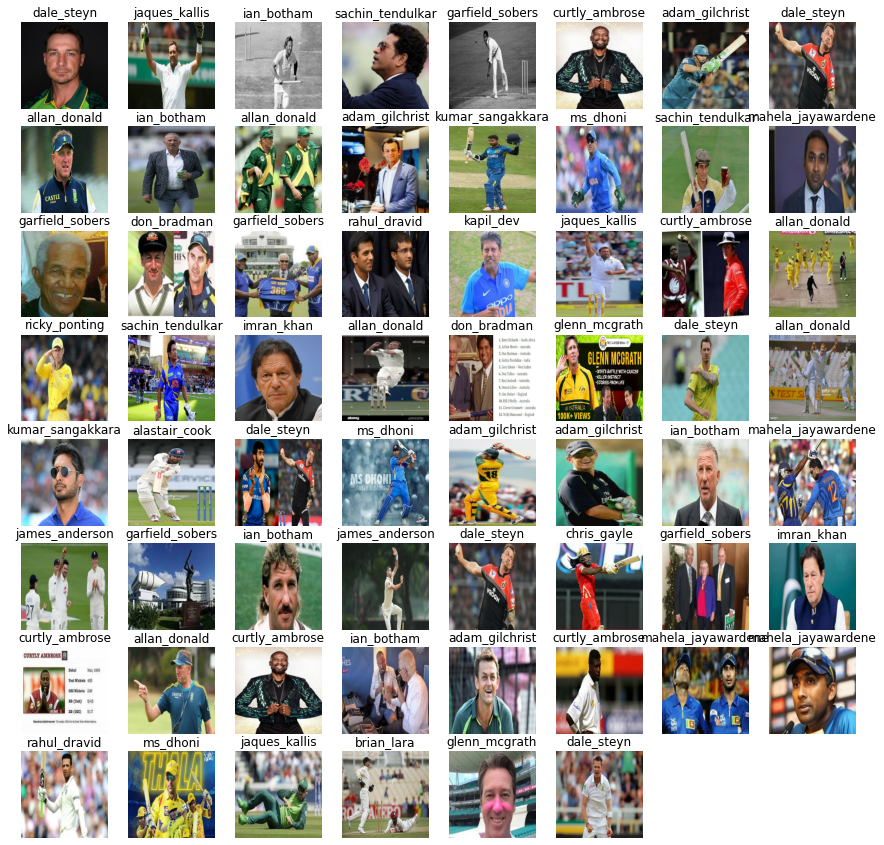

In [13]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [17]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [18]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 40

model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [19]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (62, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (62, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (62, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (62, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (62, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (62, 60, 60, 64)         

In [26]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/10
63/63 [==============================] - 450s 7s/step - loss: 1.8900 - accuracy: 0.4263 - val_loss: 1.7597 - val_accuracy: 0.4562
Epoch 2/10
63/63 [==============================] - 448s 7s/step - loss: 1.7173 - accuracy: 0.4782 - val_loss: 1.6342 - val_accuracy: 0.5046
Epoch 3/10
63/63 [==============================] - 448s 7s/step - loss: 1.5233 - accuracy: 0.5261 - val_loss: 1.4415 - val_accuracy: 0.5945
Epoch 4/10
63/63 [==============================] - 452s 7s/step - loss: 1.4017 - accuracy: 0.5727 - val_loss: 1.3141 - val_accuracy: 0.6198
Epoch 5/10
63/63 [==============================] - 446s 7s/step - loss: 1.1615 - accuracy: 0.6408 - val_loss: 1.2212 - val_accuracy: 0.6866
Epoch 6/10
63/63 [==============================] - 449s 7s/step - loss: 1.0100 - accuracy: 0.6959 - val_loss: 1.0576 - val_accuracy: 0.7189
Epoch 7/10
63/63 [==============================] - 451s 7s/step - loss: 0.8331 - accuracy: 0.7458 - val_loss: 1.0537 - val_accuracy: 0.7212
Epoch 8/10
63

In [27]:
model.evaluate(test_ds)

9/9 [==============================] - 44s 2s/step - loss: 0.9827 - accuracy: 0.7778


[0.9826750755310059, 0.7777777910232544]

In [28]:
acc = history.history['accuracy']
loss = history.history['loss']

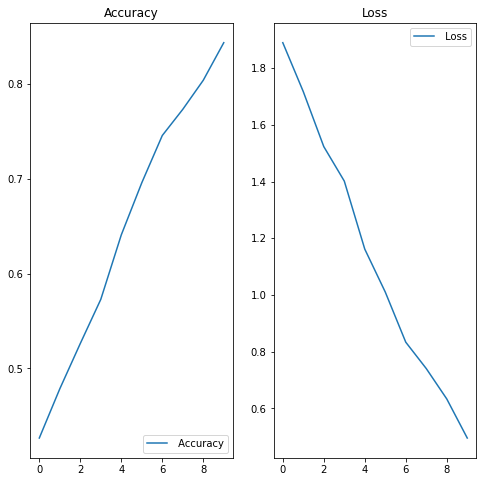

In [29]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [ ]:
image_path = "/gdrive/My Drive/Tom Hiddleston.jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [ ]:
pred = model.predict(scaled_img)

In [ ]:
output = class_names[np.argmax(pred)]

In [ ]:
output

In [30]:
model.save("cricket_legends.h5")